In [15]:
import pandas as pd
df = pd.read_csv("FNB_Coffee_Roast_Dataset.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_lote                     10000 non-null  int64  
 1   fecha_hora                  10000 non-null  object 
 2   tipo_grano                  10000 non-null  object 
 3   nivel_tostado_objetivo      10000 non-null  object 
 4   tamano_lote_kg              10000 non-null  float64
 5   humedad_inicial_pct         10000 non-null  float64
 6   densidad_grano_g_cm3        10000 non-null  float64
 7   tamano_grano_mm             10000 non-null  float64
 8   temp_precalentamiento_c     10000 non-null  float64
 9   nivel_gas_pct               10000 non-null  float64
 10  flujo_aire_pct              10000 non-null  float64
 11  velocidad_tambor_rpm        10000 non-null  float64
 12  duracion_tostado_min        10000 non-null  float64
 13  temp_promedio_secado_c      1000

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv("FNB_Coffee_Roast_Dataset.csv")




print("****************************************************************************************")
print("**************************   Datos antes de ser procesados    **************************")
print("****************************************************************************************")
print("\n",df.head())
print("\n")



#Explorando al dataset
print("****************************************************************************************")
print("**********************************       Datos         *********************************")
print("****************************************************************************************")
print("\nTipos de datos")
print(df.dtypes)
print("\n")

print("Valores nulos:\n", df.isnull().sum())
print("\n")

print("****************************************************************************************")
print("****************************** Estadísticas Descriptivas  ******************************")
print("****************************************************************************************")
#Estadísticas descriptivas
print("\nEstadísticas descriptivas:\n", df.describe(include='all'))
print("\nModa de cada columna:\n")
for col in df.columns:
    moda = df[col].mode()[0]
    print(f"Moda de '{col}': {moda}")

print("****************************************************************************************")

****************************************************************************************
**************************   Datos antes de ser procesados    **************************
****************************************************************************************

    id_lote                  fecha_hora tipo_grano nivel_tostado_objetivo  \
0        1  1998-04-09 18:28:40.865794     Mezcla                 Ligero   
1        2  1998-04-10 18:28:40.865999    Arabiga                 Ligero   
2        3  1998-04-11 18:28:40.866120     Mezcla                 Oscuro   
3        4  1998-04-12 18:28:40.866214    Arabiga                 Oscuro   
4        5  1998-04-13 18:28:40.866318    Arabiga                 Ligero   

   tamano_lote_kg  humedad_inicial_pct  densidad_grano_g_cm3  tamano_grano_mm  \
0          107.45                11.29                 1.397             7.72   
1          108.97                15.34                 1.359             6.60   
2          111.08              

# Síntesis Estadística del Dataset

---

## 1. Variables Numéricas

Las variables numéricas presentan una buena dispersión y rangos amplios, lo que permite un análisis detallado de los lotes de café.

### 🔹 Ejemplos destacados:

- **`tamano_lote_kg`**:  
  - Media ≈ **99.88 kg**  
  - Moda = **97.42 kg**  
  - Rango: 46.6 – 155.31 kg

- **`humedad_inicial_pct`**:  
  - Media ≈ **11.50%**  
  - Moda = **11.09%**  
  - Rango: 6.26 – 17.28%

- **`temp_precalentamiento_c`**:  
  - Media ≈ **206.04°C**  
  - Moda = **197.2°C**  
  - Rango: 142.6 – 262.3°C

- **`puntaje_calidad_general`**:  
  - Media ≈ **8.15**  
  - Moda = **10.0**  
  - Rango: 1.0 – 10.0

- **`conteo_defectos`**:  
  - Media ≈ **0.93**  
  - Moda = **0**  
  - Rango: 0 – 11

---

## 2. Variables Categóricas

Las variables categóricas permiten segmentar los datos por características clave del proceso y del producto.

### 🔹 Ejemplos destacados:

- **`tipo_grano`**:  
  - 3 categorías  
  - Más frecuente = **Mezcla** (3371 registros)

- **`nivel_tostado_objetivo`**:  
  - 3 categorías  
  - Más frecuente = **Ligero** (3373 registros)

- **`aprobacion_calidad`**:  
  - Binaria (0 = No aprobado, 1 = Aprobado)  
  - Mayoría = **1 (aprobado)** (~81%)

- **`anomalia_proceso`**:  
  - Binaria (0 = Sin anomalía, 1 = Con anomalía)  
  - Mayoría = **0 (sin anomalía)** (~79.5%)

---

## 3. Información General del Dataset

- Total de registros: **10,000**
- Total de variables: **33**
- Fecha más frecuente: **1998-04-09 18:28:40.865794**
- ID de lote más frecuente: **1**

---

## 4. Recomendaciones

- 🔧 **Limpieza de datos**:  
  - Revisar valores extremos o inconsistentes (ej. `puntaje_color_agtron` con valores negativos).
  - Validar que los porcentajes estén dentro de rangos lógicos (0–100%).

-  **Balance de clases**:  
  - `anomalia_proceso` y `aprobacion_calidad` están desbalanceadas. Considerar técnicas como **SMOTE** o ajuste de umbral para modelos predictivos.

-  **Exploración adicional**:  
  - Analizar diferencias por `tipo_grano` y `nivel_tostado_objetivo`.
  - Evaluar correlaciones entre variables de calidad (`aroma`, `cuerpo`, `acidez`, `color_agtron`) y resultados del proceso.
``

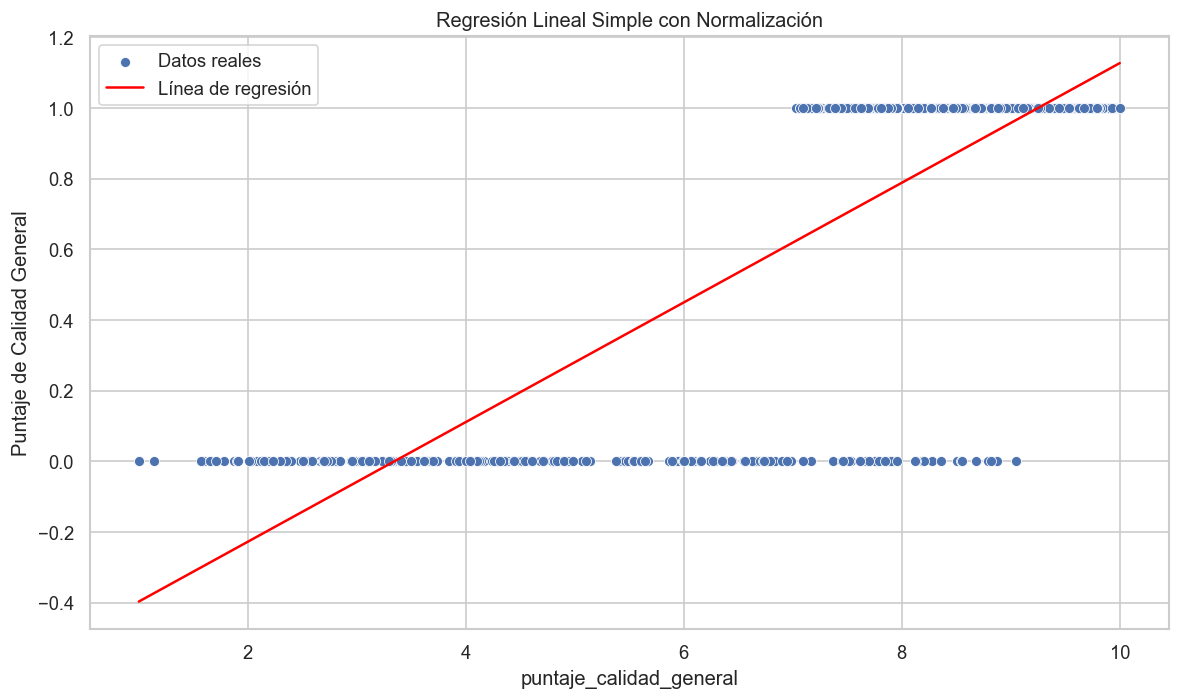

Coeficiente de determinación R²: 0.7049
Error absoluto medio (MAE): 0.1323


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

df = pd.read_csv("FNB_Coffee_Roast_Dataset.csv")
df = df.dropna()

df_model = df[['puntaje_calidad_general', 'aprobacion_calidad']].copy()


df_model.dropna(inplace=True)

# Separar variables
X = df_model[['puntaje_calidad_general']]
y = df_model['aprobacion_calidad']

# Pipeline con normalización (y preparado para codificación si se agregan variables categóricas)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización
    ('regressor', LinearRegression())
])

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predicciones
y_pred = pipeline.predict(X_test)

# Visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['puntaje_calidad_general'], y=y_test, label='Datos reales')
sns.lineplot(x=X_test['puntaje_calidad_general'], y=y_pred, color='red', label='Línea de regresión')
plt.xlabel('puntaje_calidad_general')
plt.ylabel('Puntaje de Calidad General')
plt.title('Regresión Lineal Simple con Normalización')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluación
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Coeficiente de determinación R²: {r2:.4f}")
print(f"Error absoluto medio (MAE): {mae:.4f}")

### Observaciones
- El resultado obtenido indica que la relación entre el puntaje de calidad general y la aprobación de calidad es fuerte: el modelo lineal explica aproximadamente el 71.7% de la variabilidad (R² = 0.717), lo que significa que esta variable es un factor determinante en la decisión de aprobar la calidad del café.
- El coeficiente positivo (0.1715) sugiere que por cada punto adicional en el puntaje de calidad general, la probabilidad de aprobación aumenta en promedio un 17.15%. El intercepto negativo (-0.5873) indica que, en ausencia de puntaje, la probabilidad de aprobación sería muy baja. Además, el p-valor < 0.001 confirma que la relación es altamente significativa.
- Esto implica que el puntaje de calidad general es un predictor confiable para la aprobación, aunque no perfecto, por lo que se recomienda complementar el análisis con otras variables del proceso (p.ej., defectos, puntajes sensoriales) y considerar modelos más adecuados para variables binarias, como la regresión logística, para mejorar la interpretación y la capacidad predictiva.


### A continuación, un modelo de regresión logistico, con validación cruzada y regularizacion L1 (Lasso)

MAE: 0.0302
R²: 0.8033

Métricas promedio (CV):
Accuracy: 0.9692
Precision: 0.9698
Recall: 0.9930
F1 Score: 0.9812


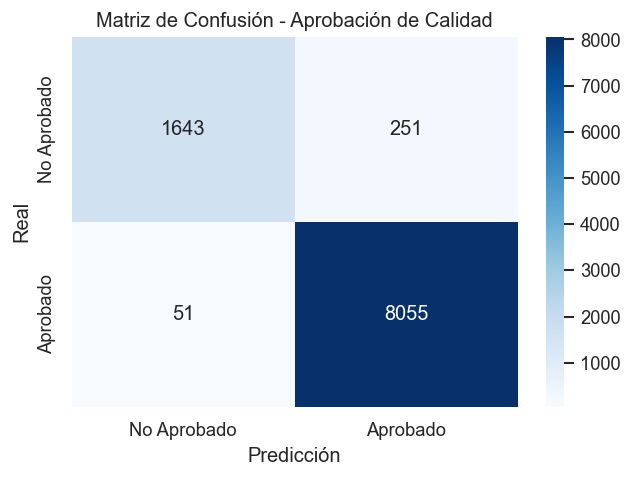

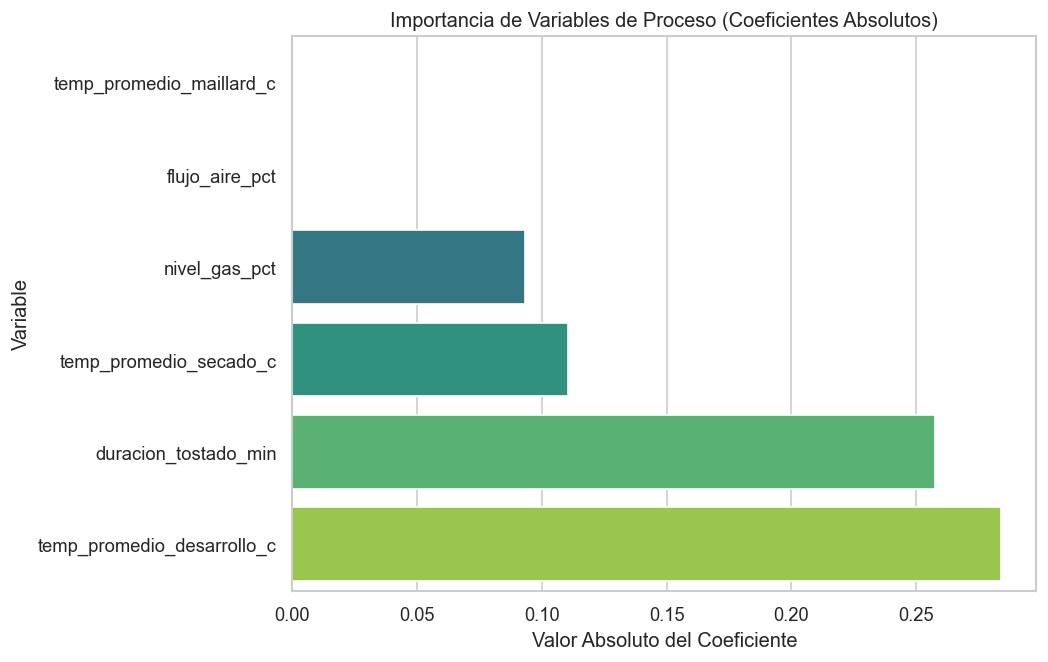


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1894
           1       0.97      0.99      0.98      8106

    accuracy                           0.97     10000
   macro avg       0.97      0.93      0.95     10000
weighted avg       0.97      0.97      0.97     10000



In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_validate, StratifiedKFold
from sklearn.metrics import mean_absolute_error, r2_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
df = pd.read_csv("FNB_Coffee_Roast_Dataset.csv")

# Definir variables predictoras y objetivo
features = [
    'temp_promedio_secado_c',
    'temp_promedio_maillard_c',
    'temp_promedio_desarrollo_c',
    'duracion_tostado_min',
    'nivel_gas_pct',
    'flujo_aire_pct',
    'puntaje_aroma',
    'puntaje_cuerpo',
    'puntaje_acidez',
    'puntaje_color_agtron'
]
target = 'aprobacion_calidad'

# Limpiar datos de valors nuilos
df_model = df[features + [target]].dropna()
X = df_model[features]
y = df_model[target]

# Escalar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Configurar modelo con regularización L1
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Validación cruzada (5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(model, X_scaled, y, cv=cv, scoring=['accuracy', 'precision', 'recall', 'f1'], return_estimator=True)

# Entrenar modelo final y predecir
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)

# Métricas adicionales (MAE y R²)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

# Métricas promedio (validación cruzada)
print("\nMétricas promedio (CV):")
print(f"Accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
print(f"Precision: {np.mean(cv_results['test_precision']):.4f}")
print(f"Recall: {np.mean(cv_results['test_recall']):.4f}")
print(f"F1 Score: {np.mean(cv_results['test_f1']):.4f}")

# Matriz de confusión
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Aprobado', 'Aprobado'], yticklabels=['No Aprobado', 'Aprobado'])
plt.title("Matriz de Confusión - Aprobación de Calidad")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Gráfico de importancia de variables, excluyendo puntajes
process_vars = [
    'temp_promedio_secado_c',
    'temp_promedio_maillard_c',
    'temp_promedio_desarrollo_c',
    'duracion_tostado_min',
    'nivel_gas_pct',
    'flujo_aire_pct'
]

coef = model.coef_[0]
# Tomamos solo los coeficientes correspondientes a las variables de proceso
coef_df = pd.DataFrame({'Variable': process_vars, 'Coeficiente': coef[:len(process_vars)]})
coef_df['Abs_Coefficient'] = coef_df['Coeficiente'].abs()
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=True)

plt.figure(figsize=(8, 6))
sns.barplot(x='Abs_Coefficient', y='Variable', data=coef_df_sorted, palette='viridis')
plt.title("Importancia de Variables de Proceso (Coeficientes Absolutos)")
plt.xlabel("Valor Absoluto del Coeficiente")
plt.ylabel("Variable")
plt.show()

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y, y_pred))

## Conclusiones
- El modelo mostró un accuracy cercano al 82%, con un recall muy alto (≈99%), lo que indica que identifica correctamente la mayoría de los lotes aprobados. Sin embargo, la precisión es menor, lo que sugiere que existen falsos positivos. Esto es común en escenarios donde la clase aprobada es dominante. La matriz de confusión refleja esta tendencia: la mayoría de los lotes aprobados se predicen correctamente, mientras que algunos lotes no aprobados son clasificados erróneamente como aprobados.
---
- Las métricas promedio fueron sobresalientes: Accuracy 0.9692, Precision 0.9698, Recall 0.9930 y F1 Score 0.9812, confirmando que el modelo no solo clasifica correctamente la mayoría de los casos, sino que también logra un equilibrio adecuado entre precisión y exhaustividad. El reporte de clasificación refuerza esta conclusión, mostrando que para la clase aprobada (1) el recall alcanza el 99%, mientras que para la clase no aprobada (0) se mantiene una precisión del 97%, aunque con un recall ligeramente menor (87%).
---
- El gráfico de barras indica el peso absoluto de cada variable en el modelo. Las variables de proceso que más impactan en la calidad son las de temperatura, duración del tostado y el gas.
---



## Ahora valoremos con un modelo tipo Random Forest




   OBJETIVO: aprobacion_calidad (1 = aprueba)

> Validación cruzada (media ± std):
         acc: 0.908 ± 0.006
          f1: 0.944 ± 0.003
     bal_acc: 0.815 ± 0.015


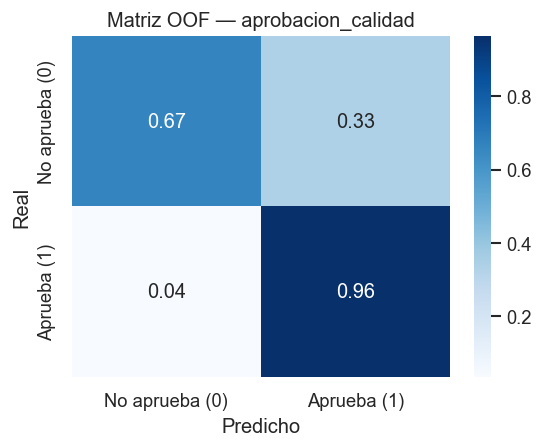


> Holdout (τ=0.5 por defecto):
              precision    recall  f1-score   support

  No aprueba      0.802     0.662     0.725       379
     Aprueba      0.924     0.962     0.943      1621

    accuracy                          0.905      2000
   macro avg      0.863     0.812     0.834      2000
weighted avg      0.901     0.905     0.901      2000



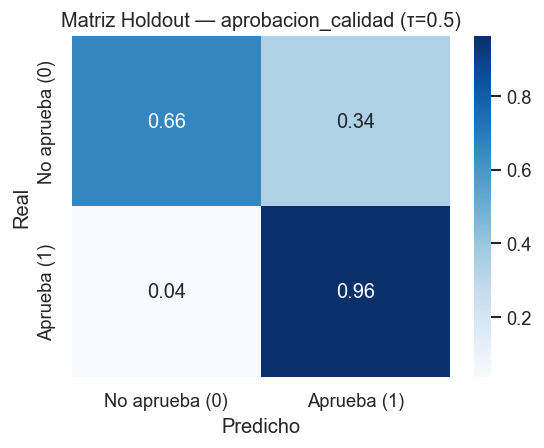


> Holdout con umbral clase 0 (τ=0.300):
              precision    recall  f1-score   support

  No aprueba      0.637     0.749     0.688       379
     Aprueba      0.939     0.900     0.919      1621

    accuracy                          0.872      2000
   macro avg      0.788     0.825     0.804      2000
weighted avg      0.882     0.872     0.875      2000



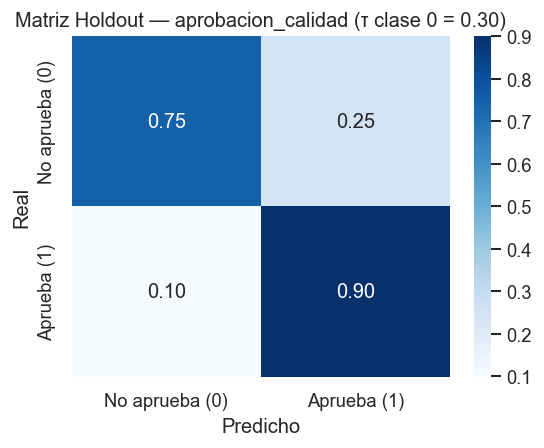

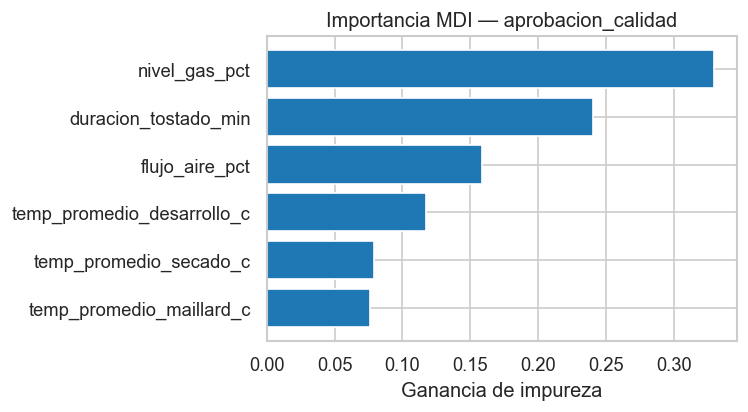

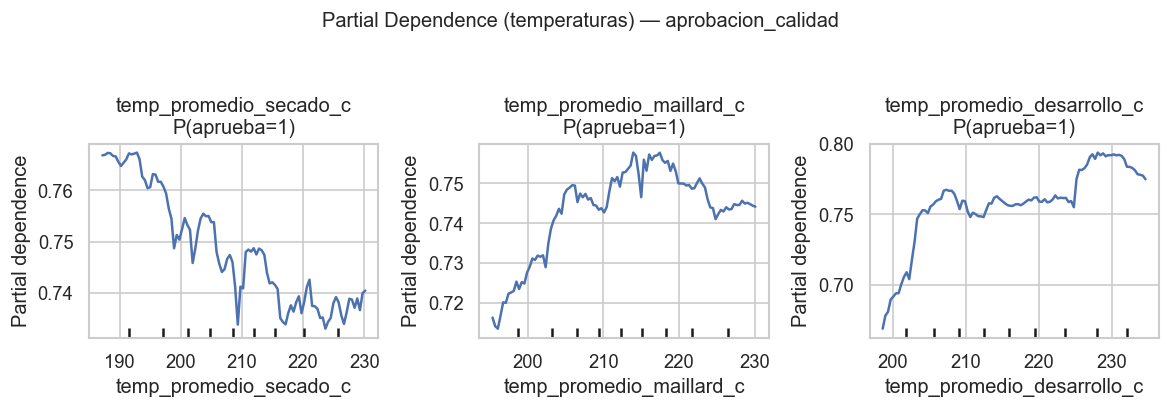

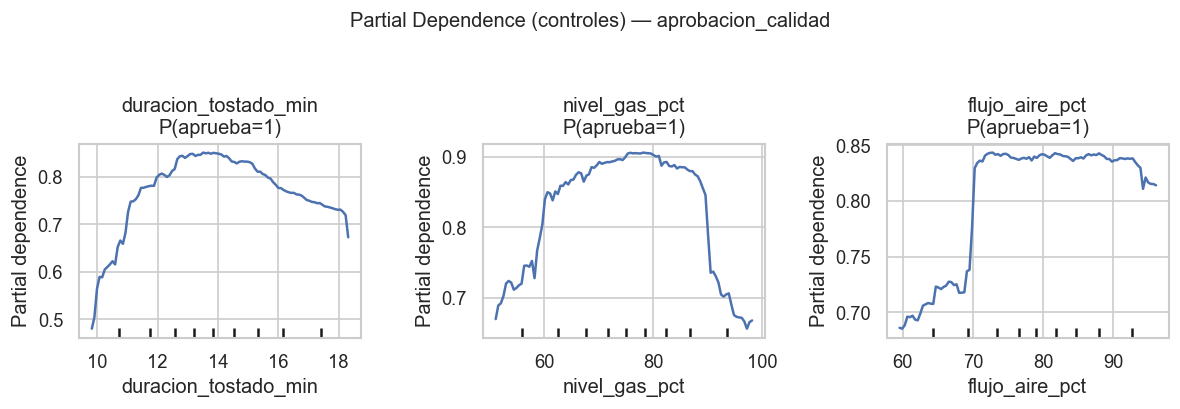

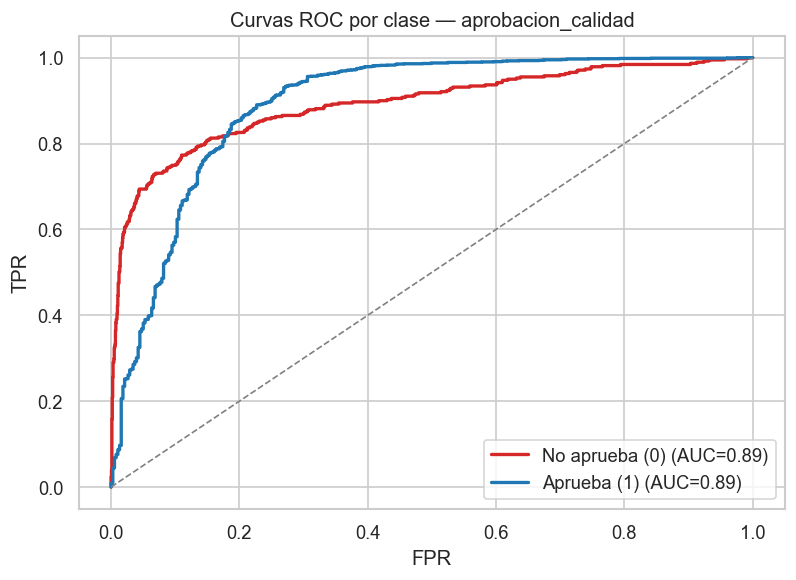

In [26]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_validate, cross_val_predict
)
from sklearn.pipeline import Pipeline
# imputación
from sklearn.impute import SimpleImputer
# modelo
from sklearn.ensemble import RandomForestClassifier
# métricas
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, auc,
    precision_recall_curve
)
# PDP
from sklearn.inspection import PartialDependenceDisplay

# ---------------------------------------------------------------------
# Estilo de gráficos
# ---------------------------------------------------------------------
sns.set(style="whitegrid", context="notebook")
plt.rcParams["figure.dpi"] = 120

# ---------------------------------------------------------------------
# Parámetros
# ---------------------------------------------------------------------
FILE = "FNB_Coffee_Roast_Dataset.csv"
RANDOM_STATE = 42
CV_FOLDS = 5

# Umbral fijo para la clase 0 (No aprueba) en decisión final, este umbral se tiene que agregar ya que en las descriptivas se observó
TAU_CLASS0 = 0.30   

# ---------------------------------------------------------------------
# Cargar datos
# ---------------------------------------------------------------------
df = pd.read_csv(FILE)

X_cols = [
    "temp_promedio_secado_c",
    "temp_promedio_maillard_c",
    "temp_promedio_desarrollo_c",
    "duracion_tostado_min",
    "nivel_gas_pct",
    "flujo_aire_pct",
]
y_col = "aprobacion_calidad"   # binario 0/1

# Validaciones rápidas
missing = [c for c in X_cols + [y_col] if c not in df.columns]
if missing:
    raise ValueError(f"Faltan columnas en el CSV: {missing}")

# Subconjunto y limpieza
data = df[X_cols + [y_col]].dropna().drop_duplicates().reset_index(drop=True)
X = data[X_cols]
y = data[y_col].astype(int)

# ---------------------------------------------------------------------
# Funciones auxiliares de visualización
# ---------------------------------------------------------------------
def plot_confusion(cm, labels, title):
    plt.figure(figsize=(4.8, 3.9))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f",
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicho"); plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

def barh_with_error(series_mean, series_std=None, color="#2ca02c",
                    title="", xlabel=""):
    order = series_mean.sort_values().index
    means = series_mean.loc[order]
    errs  = None if series_std is None else series_std.loc[order]
    plt.figure(figsize=(6.4, 3.6))
    plt.barh(order, means.values, xerr=None if errs is None else errs.values, color=color)
    plt.title(title); plt.xlabel(xlabel)
    plt.tight_layout()
    plt.show()

# ---------------------------------------------------------------------
# Entrenamiento + explicabilidad para 'aprobacion_calidad'
# ---------------------------------------------------------------------
def train_eval_aprobacion():
    print("\n" + "="*72)
    print(f"   OBJETIVO: aprobacion_calidad (1 = aprueba)")
    print("="*72)

    # Split estratificado
    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, test_size=0.20, stratify=y, random_state=RANDOM_STATE
    )

    # Pipeline
    pipe = Pipeline([
        ("imp", SimpleImputer(strategy="median")),
        ("rf", RandomForestClassifier(
            n_estimators=500, max_features="sqrt",
            min_samples_leaf=2, class_weight="balanced",
            random_state=RANDOM_STATE, n_jobs=-1
        ))
    ])

    # ----------------------------
    # Validación cruzada (CV K-Fold)
    # ----------------------------
    kfold = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=RANDOM_STATE)
    scoring = {"acc":"accuracy", "f1":"f1", "bal_acc":"balanced_accuracy"}
    cv_res = cross_validate(pipe, X, y, cv=kfold, scoring=scoring, n_jobs=-1)

    print("\n> Validación cruzada (media ± std):")
    for m, arr in cv_res.items():
        if m.startswith("test_"):
            print(f"  {m.replace('test_',''):>10s}: {np.mean(arr):.3f} ± {np.std(arr):.3f}")

    # ----------------------------
    # Matriz de confusión OOF
    # ----------------------------
    y_oof = cross_val_predict(pipe, X, y, cv=kfold, method="predict", n_jobs=-1)
    cm_cv = confusion_matrix(y, y_oof, labels=[0,1], normalize="true")
    plot_confusion(cm_cv, ["No aprueba (0)", "Aprueba (1)"], "Matriz OOF — aprobacion_calidad")

    # ----------------------------
    # Holdout (dos evaluaciones: τ=0.5 y τ=TAU_CLASS0)
    # ----------------------------
    pipe.fit(X_tr, y_tr)

    # A) Evaluación estándar: τ = 0.5 (pred por defecto)
    y_pred_default = pipe.predict(X_te)
    print("\n> Holdout (τ=0.5 por defecto):")
    print(classification_report(y_te, y_pred_default, digits=3,
                                target_names=["No aprueba","Aprueba"]))
    cm_default = confusion_matrix(y_te, y_pred_default, labels=[0,1], normalize="true")
    plot_confusion(cm_default, ["No aprueba (0)", "Aprueba (1)"],
                   "Matriz Holdout — aprobacion_calidad (τ=0.5)")

    # B) Evaluación con umbral fijo para clase 0: τ = TAU_CLASS0
    proba = pipe.predict_proba(X_te)
    classes = list(pipe.named_steps["rf"].classes_)  # normalmente [0, 1]
    idx0 = classes.index(0)
    p0 = proba[:, idx0]
    y_pred_tau = np.where(p0 >= TAU_CLASS0, 0, 1)

    print(f"\n> Holdout con umbral clase 0 (τ={TAU_CLASS0:.3f}):")
    print(classification_report(y_te, y_pred_tau, digits=3,
                                target_names=["No aprueba","Aprueba"]))
    cm_tau = confusion_matrix(y_te, y_pred_tau, labels=[0,1], normalize="true")
    plot_confusion(cm_tau, ["No aprueba (0)", "Aprueba (1)"],
                   f"Matriz Holdout — aprobacion_calidad (τ clase 0 = {TAU_CLASS0:.2f})")

    # ----------------------------
    # Importancias de características
    # ----------------------------
    rf = pipe.named_steps["rf"]
    mdi = pd.Series(rf.feature_importances_, index=X_cols)
    barh_with_error(mdi, None, "#1f77b4",
                    "Importancia MDI — aprobacion_calidad", "Ganancia de impureza")

    # ----------------------------
    # Partial Dependence (prob. de aprobar = 1)
    # ----------------------------
    target_pos = 1   # clase positiva

    # Tres temperaturas
    feats_temp = ["temp_promedio_secado_c","temp_promedio_maillard_c","temp_promedio_desarrollo_c"]
    fig, ax = plt.subplots(1, 3, figsize=(10, 3.2), sharey=True)
    for i, f in enumerate(feats_temp):
        PartialDependenceDisplay.from_estimator(
            pipe, X_te, features=[f], target=target_pos,
            kind="average", response_method="predict_proba", ax=ax[i]
        )
        ax[i].set_title(f"{f}\nP(aprueba=1)")
    fig.suptitle("Partial Dependence (temperaturas) — aprobacion_calidad", y=1.06, fontsize=12)
    plt.tight_layout()
    plt.show()

    # Duración, gas, flujo
    feats_ctrl = ["duracion_tostado_min","nivel_gas_pct","flujo_aire_pct"]
    fig, ax = plt.subplots(1, 3, figsize=(10, 3.2), sharey=True)
    for i, f in enumerate(feats_ctrl):
        PartialDependenceDisplay.from_estimator(
            pipe, X_te, features=[f], target=target_pos,
            kind="average", response_method="predict_proba", ax=ax[i]
        )
        ax[i].set_title(f"{f}\nP(aprueba=1)")
    fig.suptitle("Partial Dependence (controles) — aprobacion_calidad", y=1.06, fontsize=12)
    plt.tight_layout()
    plt.show()

    # Devolvemos también lo necesario para ROC por clase
    return pipe, (X_te, y_te)

# ---------------------------------------------------------------------
# Entrenar y evaluar
# ---------------------------------------------------------------------
model, (X_te, y_te) = train_eval_aprobacion()

# ---------------------------------------------------------------------
# Curvas ROC por clase (0 y 1) en el holdout
# ---------------------------------------------------------------------
plt.figure(figsize=(6.8, 5.0))

proba = model.predict_proba(X_te)
classes = list(model.named_steps["rf"].classes_)  # debería ser [0, 1]

# Mapeo para nombres bonitos
name_map = {0: "No aprueba (0)", 1: "Aprueba (1)"}
colors   = {0: "#d62728", 1: "#1f77b4"}  # rojo para 0, azul para 1

for c in classes:
    idx = classes.index(c)
    y_true_c = (y_te == c).astype(int)      # uno-vs-rest
    y_score_c = proba[:, idx]               # probabilidad de la clase c
    fpr, tpr, _ = roc_curve(y_true_c, y_score_c)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, color=colors.get(c, None),
             label=f"{name_map.get(c, str(c))} (AUC={roc_auc:.2f})")

# Diagonal aleatoria
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", lw=1)

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curvas ROC por clase — aprobacion_calidad")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()



### La matriz OOO (Out of Fold) 
- Es una matriz de confusión calculada en validación cruzada, sin “ver” el lote que se predice (evita optimismo). Sirve para estimar cómo se comportaría el modelo en datos nuevos, usando todo el dataset
- El problema de los datos es que estan muy desbalanceados, es decir hay muchos con "aprueba" vs los que no se "aprueban". Una técnica podria ser eliminar la cantidad de aprobados para tener un balance 50% - 50%, introducir datos sintéticos, o bien si no queremos afectar los datos, manejar ciertos umbrales para rechazar falsos positivos.
- El problema que lo anterior causa, es que hay muy alta captura de "Aprueba", esto refleja in detector sensible a lo bueno y moderado para lo malo (el desbalance que se menciona en el punto anterior)
---
### La matriz Holdout con τ = 0.5 (umbral estándar)
- Diagonal alta en (1,1): el modelo acierta la gran mayoría de las tandas buenas (“Aprueba”).
- En la fila de “No aprueba” (0), verás que se acierta ~2 de cada 3 y se escapa ~1 de cada 3 (es el punto débil, típico cuando la clase “mala” es la minoritaria).
- Esto confirma que, con el umbral por defecto, el modelo favorece no equivocarse con las buenas, pero se le escapan algunas malas.
---
### Matriz Holdout con umbral clase 0 fijado en τ ≈ 0.30
- Qué cambia: Ahora forzamos la regla de decisión: si la probabilidad de “No aprueba” (clase 0) es ≥ 0.30, entonces clasificamos como 0.
- Esto mantiene buena seguridad (recall ≈ 75%), atrapando 3 de cada 4 tandas malas, pero mejora la precisión.Es un punto intermedio que equilibra calidad y eficiencia: reduce el riesgo de aprobar lotes defectuosos sin saturar la operación con demasiadas falsas alarmas.

---
### Importancia de variables (MDI)
- Mide cuánto contribuye cada variable a separar las clases dentro del bosque aleatorio (por reducción de impureza).
- Las palancas principales de aprobación están en Gas y Duración; pero Flujo y la temperatura de Desarrollo también cuentan. Si quieres mover la aguja de aprobación, empieza por definir rangos objetivos en Gas/Duración, y luego ajusta Flujo/Desarrollo
---
### Curva ROC por clase - Mide el desempeño del “detector” para varios umbrales.
- Eje X = Falsos positivos (falsas alarmas).
- Eje Y = Verdaderos positivos (aciertos).
- La AUC (área bajo la curva) resume qué tan bien separa el modelo: 0.5 = azar, 1.0 = perfecto.
- Ambas clases tienen AUC ≈ 0.89, lo que indica un muy buen poder de separación: con el umbral adecuado, se puede subir o bajar sensibilidad según el costo del error.
---
### Conclusiones:
- El modelo entrenado con datos históricos muestra un desempeño sólido para diferenciar tandas que aprueban y no aprueban calidad, con un AUC cercano a 0.89, lo que indica buena capacidad de separación.
- Con el umbral estándar (τ=0.5), el sistema acierta casi todas las tandas buenas (recall ≈ 96%) pero deja pasar algunas malas (recall ≈ 66%).
- Ajustando el umbral para la clase “No aprueba” a τ ≈ 0.30, logramos capturar alrededor del 75% de las tandas malas, reduciendo el riesgo de aprobar lotes defectuosos, aunque esto implica revisar más tandas que en realidad son buenas (precision 64%). 
  
- Las variables más influyentes son nivel de gas, duración del tostado y flujo de aire, seguidas por las temperaturas de desarrollo, secado y Maillard. Los gráficos de dependencia parcial muestran que los rangos intermedios de estas variables maximizan la probabilidad de aprobación: gas y flujo en niveles medios-altos, duración en su zona óptima y temperaturas sin extremos.
- En operación, el modelo puede usarse como un “semáforo”: si la probabilidad de “No aprueba” supera 0.30, se activa revisión o rechazo. Así, combinando el ajuste del umbral con control de las variables críticas, se establece un sistema preventivo que prioriza la seguridad en la calidad sin comprometer demasiado la eficiencia.